# RICE LEAF DISEASE DETECTION



IMPORTING NECESSARY LIBRARY

In [ ]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [ ]:
## To connect Google Drive (GDrive) with Colab
# Step:2 Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(r"/content/drive/MyDrive/RiceLeaf-Disease-Detector-mukesh/RiceLeaf-Disease-Detector-mukesh/bacterical disease", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 120 files [00:34,  3.47 files/s]


In [ ]:
# Sorting the path of data into veriable
train = '/content/drive/MyDrive/RiceLeaf-Disease-Detector-mukesh/RiceLeaf-Disease-Detector-mukesh/bacterical disease'  #Location of training images
validation = '/content/drive/MyDrive/RiceLeaf-Disease-Detector-mukesh/RiceLeaf-Disease-Detector-mukesh/bacterical disease' # Location of test images
test ='/content/drive/MyDrive/RiceLeaf-Disease-Detector-mukesh/RiceLeaf-Disease-Detector-mukesh/bacterical disease' # Location of test images

### GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES

In [ ]:
# Generating batches of image data
train_data = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val = ImageDataGenerator(rescale=(1./255))


train_gen = train_data.flow_from_directory(
    train,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_gen = val.flow_from_directory(
    validation,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


### PLOTTING TRAIN IMAGES WITH THEIR LABELS

In [ ]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

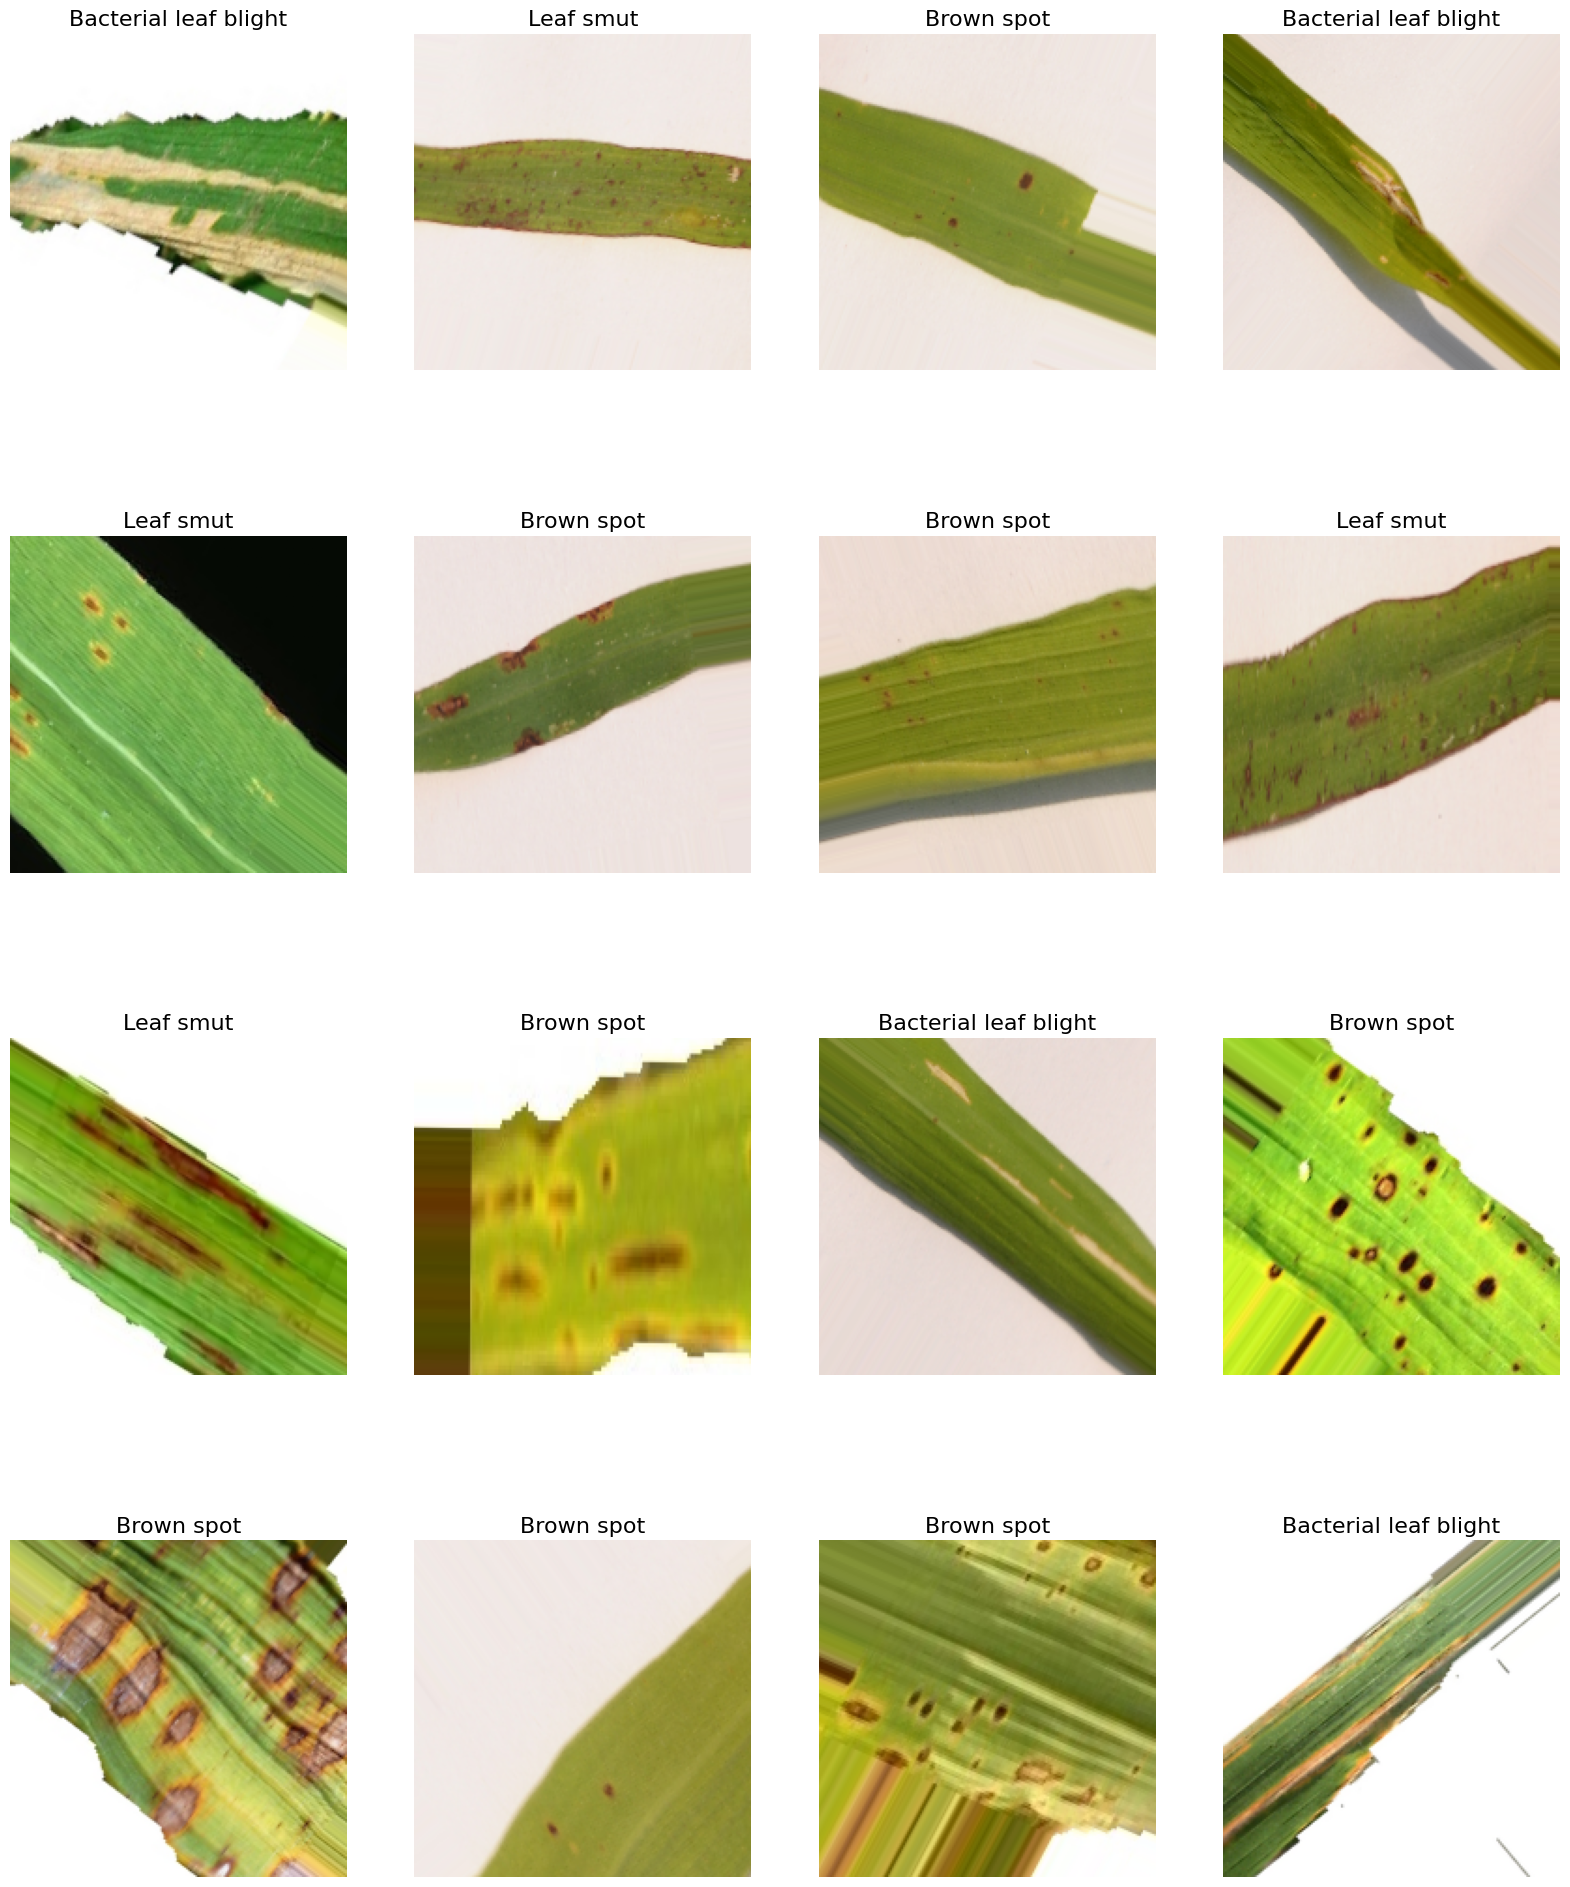

In [ ]:
imgs, labels = next(train_gen)
plots(imgs, title = labels)

## CNN MODEL ARCHITECTURE

In [ ]:
from keras.layers import Activation
from keras import models, layers

m = models.Sequential()
m.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
m.add(layers.MaxPool2D(pool_size=(2,2)))
m.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
m.add(layers.MaxPool2D(pool_size=(2,2)))
m.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
m.add(layers.MaxPool2D(pool_size=(2,2)))
m.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
m.add(layers.MaxPool2D(pool_size=(2,2)))
m.add(layers.Dropout(rate=0.5))
m.add(layers.Flatten())
m.add(layers.Dense(3, activation ='softmax'))

### SUMMARY OF MODEL

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

### COMPILE MODEL

In [ ]:
from tensorflow.keras import optimizers
m.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### TRAIN MODEL

In [ ]:
# Fitting the data
history = m.fit_generator(train_gen,
    epochs=30, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_gen,
)

Epoch 1/30
8/8 [==============================] - 5s 625ms/step - loss: 0.6769 - accuracy: 0.7000 - val_loss: 0.4974 - val_accuracy: 0.7667
Epoch 2/30
8/8 [==============================] - 8s 1s/step - loss: 0.6972 - accuracy: 0.6833 - val_loss: 0.6225 - val_accuracy: 0.7083
Epoch 3/30
8/8 [==============================] - 12s 2s/step - loss: 0.6287 - accuracy: 0.7417 - val_loss: 0.4766 - val_accuracy: 0.8167
Epoch 4/30
8/8 [==============================] - 10s 1s/step - loss: 0.5911 - accuracy: 0.7583 - val_loss: 0.4671 - val_accuracy: 0.8083
Epoch 5/30
8/8 [==============================] - 4s 518ms/step - loss: 0.5346 - accuracy: 0.7583 - val_loss: 0.4743 - val_accuracy: 0.8000
Epoch 6/30
8/8 [==============================] - 4s 529ms/step - loss: 0.4330 - accuracy: 0.8000 - val_loss: 0.4381 - val_accuracy: 0.8000
Epoch 7/30
8/8 [==============================] - 5s 676ms/step - loss: 0.4823 - accuracy: 0.7583 - val_loss: 0.4837 - val_accuracy: 0.7750
Epoch 8/30
8/8 [===========

### AFTER TRAINING
* Validation accuracy.91.67%
* Training accuracy.84.38%

### MODEL SAVING

In [ ]:
m.save("model.h5")

### PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

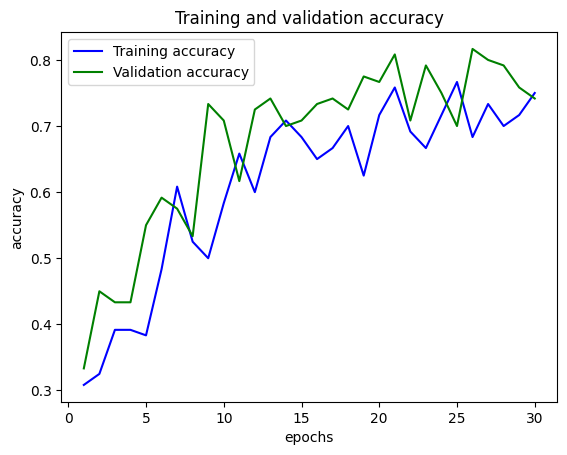

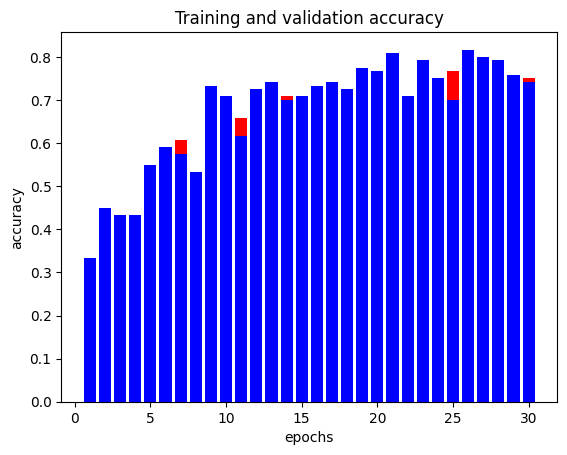

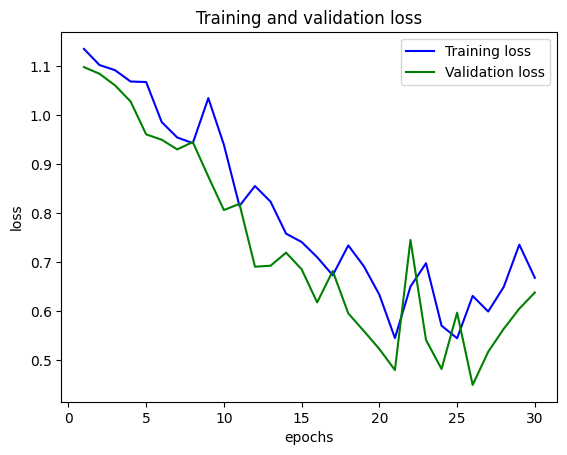

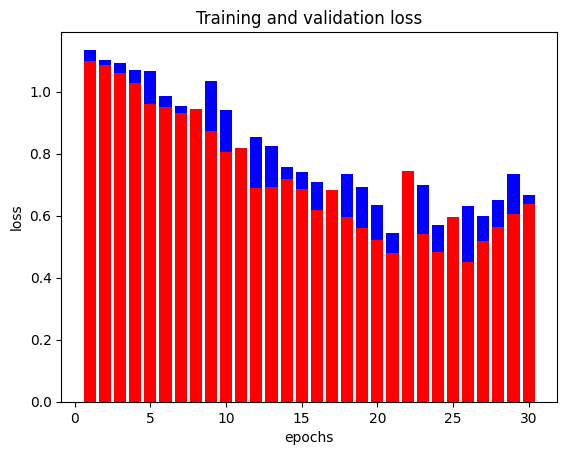

In [ ]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()

plt.bar(epochs, accuracy, label="Training accuracy",color='red')
plt.bar(epochs, val_accuracy, label="Validation accuracy",color='blue')
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.bar(epochs, loss, label="Training loss",color='blue')
plt.bar(epochs, val_loss, label="Validation loss",color='red')
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


### CREATED MODEL SUMMARY

In [ ]:
model = tf.keras.models.load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

### EVALUATION AND TESTING MODEL

1.   List item
2.   List item



In [ ]:
test_datagen = ImageDataGenerator(rescale=(1./255))
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 120 images belonging to 3 classes.


In [ ]:
model.evaluate(test_generator)

8/8 [==============================] - 2s 265ms/step - loss: 0.6378 - accuracy: 0.7417


[0.6377611756324768, 0.7416666746139526]

* Here the loss is 0.53 and the accuracy of the model is 0.91 percent means 91%.

### VISUALISE THE PREDICTION OF MODEL

1/1 [==============================] - 0s 19ms/step


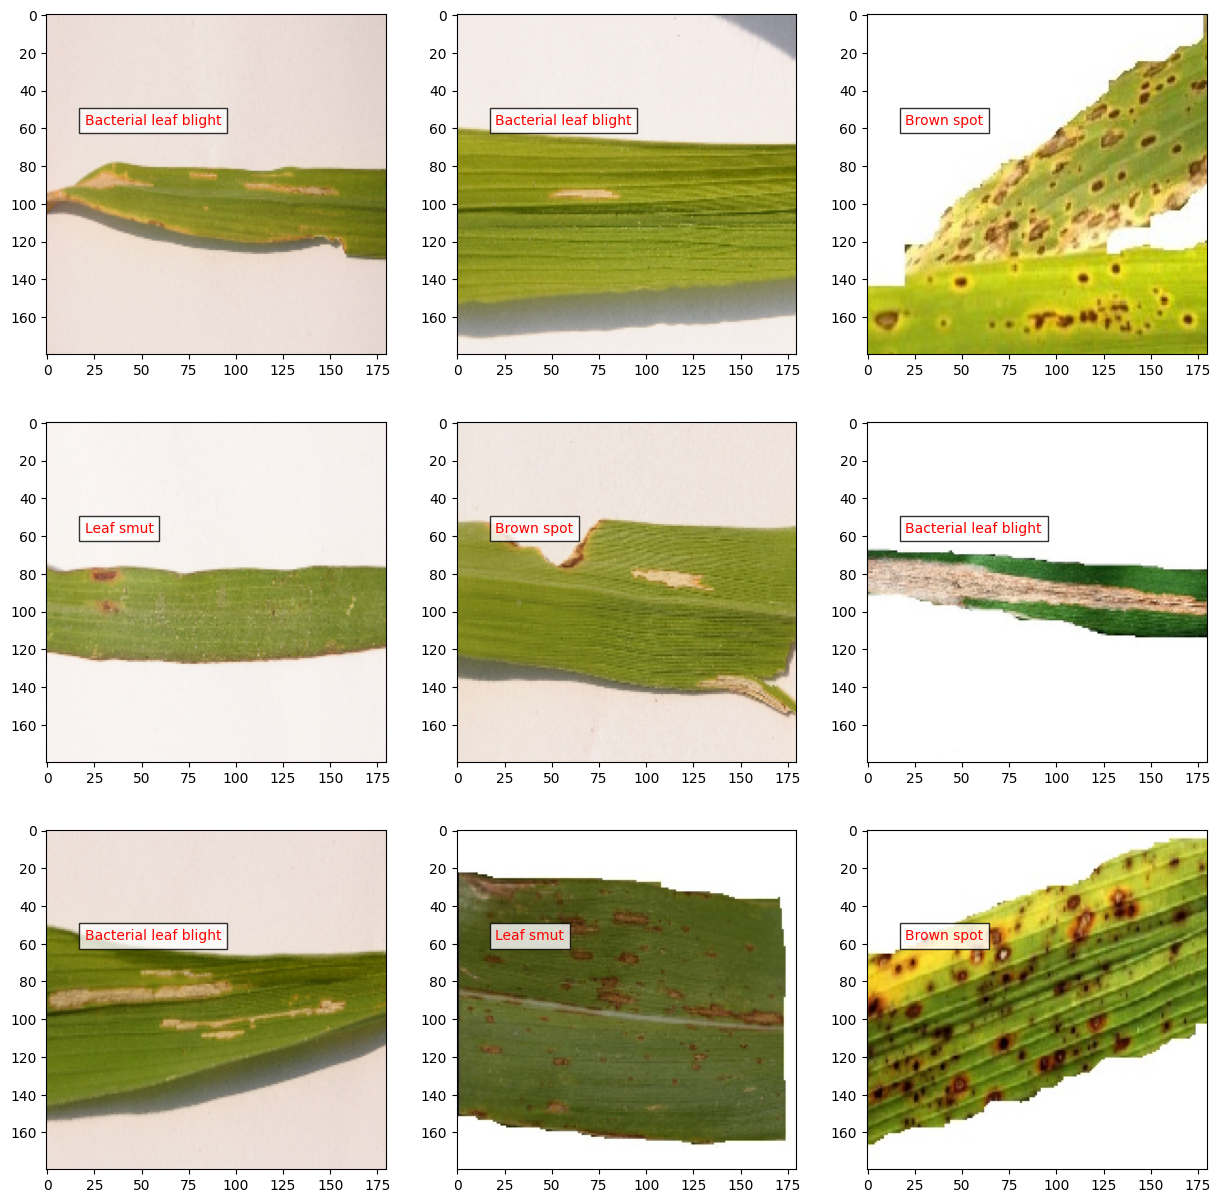

In [ ]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have your features (X) and labels (y) ready
# X should be your feature matrix (rows are samples, columns are features)
# y should be your target vector (labels corresponding to each sample)

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train, validation, test_size=0.2, random_state=42)

# Convert your lists to DataFrame objects if they contain tabular data
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Assuming your data has column names, you can access them using the columns attribute
feature_names = X_train.columns.tolist()

# Use the same feature names for X_val
X_val = X_val[feature_names]

# Convert categorical variables to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure feature alignment between training and validation datasets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the Decision Tree classifier using the preprocessed data
decision_tree_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed validation set
y_pred = decision_tree_model.predict(X_val_encoded)

# Adjust the length of y_val to match the length of y_pred
y_val = y_val[:len(y_pred)]
# Check if the lengths of y_val and y_pred are consistent
if len(y_val) != len(y_pred):
    print("Error: Inconsistent number of samples between y_val and y_pred.")
    print("Length of y_val:", len(y_val))
    print("Length of y_pred:", len(y_pred))
else:
    # Calculate the accuracy of the model
    accuracy_decision_tree = accuracy_score(y_val, y_pred)
    print("Accuracy of Decision Tree model:", accuracy_decision_tree)


Accuracy of Decision Tree model: 0.9545454545454546


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming you have your features (X) and labels (y) ready
# X should be your feature matrix (rows are samples, columns are features)
# y should be your target vector (labels corresponding to each sample)

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train, validation, test_size=0.2, random_state=42)

# Convert your lists to DataFrame objects if they contain tabular data
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Assuming your data has column names, you can access them using the columns attribute
feature_names = X_train.columns.tolist()

# Use the same feature names for X_val
X_val = X_val[feature_names]

# Convert categorical variables to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure feature alignment between training and validation datasets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the Decision Tree classifier using the preprocessed data
decision_tree_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed validation set
y_pred = decision_tree_model.predict(X_val_encoded)

# Calculate evaluation metrics
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print("Precision of Decision Tree model:", precision)
print("Recall of Decision Tree model:", recall)
print("F1-score of Decision Tree model:", f1)


Precision of Decision Tree model: 0.9545454545454546
Recall of Decision Tree model: 0.9545454545454546
F1-score of Decision Tree model: 0.9545454545454546


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have your features (X) and labels (y) ready
# X should be your feature matrix (rows are samples, columns are features)
# y should be your target vector (labels corresponding to each sample)

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train, validation, test_size=0.2, random_state=42)

# Convert your lists to DataFrame objects if they contain tabular data
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Assuming your data has column names, you can access them using the columns attribute
feature_names = X_train.columns.tolist()

# Use the same feature names for X_val
X_val = X_val[feature_names]

# Convert categorical variables to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure feature alignment between training and validation datasets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the Logistic Regression model using the preprocessed data
logistic_regression_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed validation set
y_pred = logistic_regression_model.predict(X_val_encoded)

# Adjust the length of y_val to match the length of y_pred
y_val = y_val[:len(y_pred)]

# Check if the lengths of y_val and y_pred are consistent
if len(y_val) != len(y_pred):
    print("Error: Inconsistent number of samples between y_val and y_pred.")
    print("Length of y_val:", len(y_val))
    print("Length of y_pred:", len(y_pred))
else:
    # Calculate the accuracy of the model
    accuracy_logistic_regression = accuracy_score(y_val, y_pred)
    print("Accuracy of Logistic Regression model:", accuracy_logistic_regression)


Accuracy of Logistic Regression model: 0.6818181818181818


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming you have your features (X) and labels (y) ready
# X should be your feature matrix (rows are samples, columns are features)
# y should be your target vector (labels corresponding to each sample)

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train, validation, test_size=0.2, random_state=42)

# Convert your lists to DataFrame objects if they contain tabular data
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Assuming your data has column names, you can access them using the columns attribute
feature_names = X_train.columns.tolist()

# Use the same feature names for X_val
X_val = X_val[feature_names]

# Convert categorical variables to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure feature alignment between training and validation datasets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the Logistic Regression model using the preprocessed data
logistic_regression_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed validation set
y_pred = logistic_regression_model.predict(X_val_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy of Logistic Regression model:", accuracy)
print("Precision of Logistic Regression model:", precision)
print("Recall of Logistic Regression model:", recall)
print("F1-score of Logistic Regression model:", f1)


Accuracy of Logistic Regression model: 0.6818181818181818
Precision of Logistic Regression model: 0.6420454545454546
Recall of Logistic Regression model: 0.6818181818181818
F1-score of Logistic Regression model: 0.6464646464646464


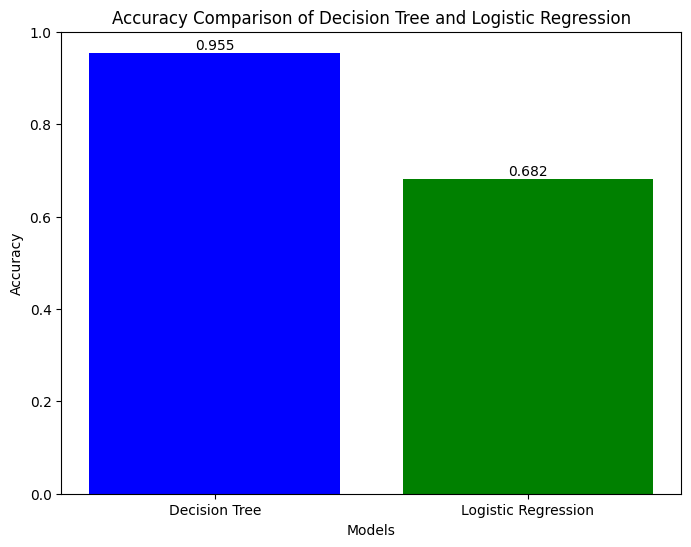

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of Decision Tree and Logistic Regression models
accuracy_scores = [accuracy_decision_tree, accuracy_logistic_regression]  # Replace these with your actual accuracy scores

# Model labels for the x-axis
models = ['Decision Tree', 'Logistic Regression']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])

# Adding titles and labels
plt.title('Accuracy Comparison of Decision Tree and Logistic Regression')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the accuracy scores on top of the bars
for i in range(len(models)):
    plt.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.3f}', ha='center', va='bottom')

# Show the plot
plt.ylim(0, 1)  # Set the y-axis limit to 0-1
plt.show()


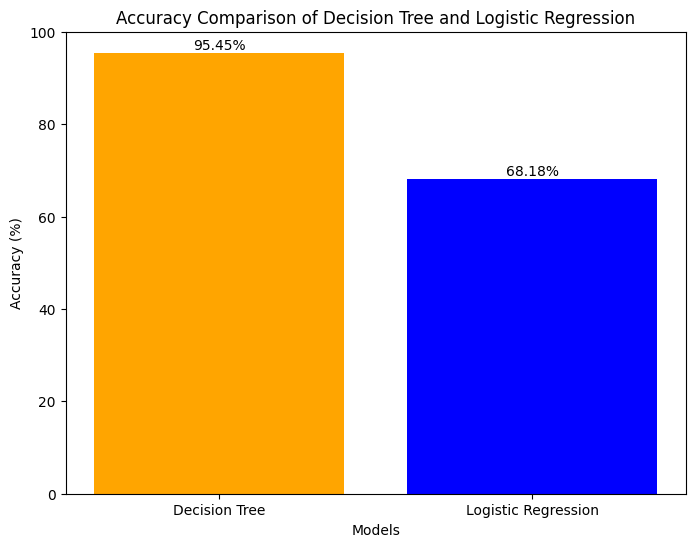

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of Decision Tree and Logistic Regression models (in decimal form)
accuracy_scores = [accuracy_decision_tree, accuracy_logistic_regression]  # Replace these with your actual accuracy scores

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Model labels for the x-axis
models = ['Decision Tree', 'Logistic Regression']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_percentages, color=['orange', 'blue'])

# Adding titles and labels
plt.title('Accuracy Comparison of Decision Tree and Logistic Regression')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Display the accuracy percentages on top of the bars
for i in range(len(models)):
    plt.text(i, accuracy_percentages[i], f'{accuracy_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 (percentage scale)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have your features (X) and labels (y) ready
# X should be your feature matrix (rows are samples, columns are features)
# y should be your target vector (labels corresponding to each sample)

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train, validation, test_size=0.2, random_state=42)

# Convert your lists to DataFrame objects if they contain tabular data
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Assuming your data has column names, you can access them using the columns attribute
feature_names = X_train.columns.tolist()

# Use the same feature names for X_val
X_val = X_val[feature_names]

# Convert categorical variables to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure feature alignment between training and validation datasets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the Random Forest model using the preprocessed data
random_forest_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed validation set
y_pred = random_forest_model.predict(X_val_encoded)

# Adjust the length of y_val to match the length of y_pred
y_val = y_val[:len(y_pred)]

# Check if the lengths of y_val and y_pred are consistent
if len(y_val) != len(y_pred):
    print("Error: Inconsistent number of samples between y_val and y_pred.")
    print("Length of y_val:", len(y_val))
    print("Length of y_pred:", len(y_pred))
else:
    # Calculate the accuracy of the model
    accuracy_random_forest = accuracy_score(y_val, y_pred)
    print("Accuracy of Random Forest model:", accuracy_random_forest)


Accuracy of Random Forest model: 0.9545454545454546


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train, validation, test_size=0.2, random_state=42)

# Convert your lists to DataFrame objects if they contain tabular data
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Assuming your data has column names, you can access them using the columns attribute
feature_names = X_train.columns.tolist()

# Use the same feature names for X_val
X_val = X_val[feature_names]

# Convert categorical variables to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure feature alignment between training and validation datasets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the Random Forest model using the preprocessed data
random_forest_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed validation set
y_pred = random_forest_model.predict(X_val_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy of Random Forest model:", accuracy)
print("Precision of Random Forest model:", precision)
print("Recall of Random Forest model:", recall)
print("F1-score of Random Forest model:", f1)


Accuracy of Random Forest model: 0.9545454545454546
Precision of Random Forest model: 0.9545454545454546
Recall of Random Forest model: 0.9545454545454546
F1-score of Random Forest model: 0.9545454545454546


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Set a random seed for reproducibility
random_seed = 42

# Assuming you have your features (X) and labels (y) ready
# X should be your feature matrix (rows are samples, columns are features)
# y should be your target vector (labels corresponding to each sample)

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(train, validation, test_size=0.2, random_state=random_seed)

# Convert your lists to DataFrame objects if they contain tabular data
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Assuming your data has column names, you can access them using the columns attribute
feature_names = X_train.columns.tolist()

# Use the same feature names for X_val
X_val = X_val[feature_names]

# Convert categorical variables to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Ensure feature alignment between training and validation datasets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=random_seed)

# Fit the Random Forest model using the preprocessed data
random_forest_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed validation set
y_pred = random_forest_model.predict(X_val_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy of Random Forest model:", accuracy)
print("Precision of Random Forest model:", precision)
print("Recall of Random Forest model:", recall)
print("F1-score of Random Forest model:", f1)

# Perform cross-validation to get a more robust estimate of model performance
cv_scores = cross_val_score(random_forest_model, X_train_encoded, y_train, cv=5)
print("Cross-Validation Mean Accuracy:", cv_scores.mean())


Accuracy of Random Forest model: 0.9545454545454546
Precision of Random Forest model: 0.9545454545454546
Recall of Random Forest model: 0.9545454545454546
F1-score of Random Forest model: 0.9545454545454546
Cross-Validation Mean Accuracy: 0.9176470588235294


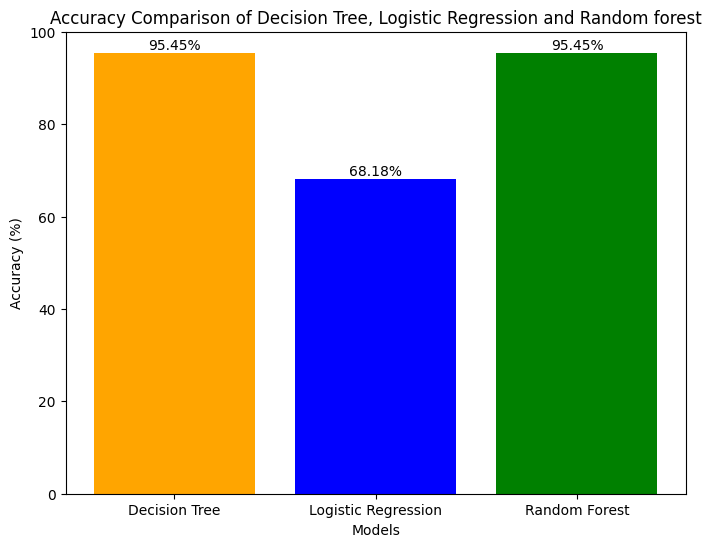

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of Decision Tree and Logistic Regression models (in decimal form)
accuracy_scores = [accuracy_decision_tree, accuracy_logistic_regression, accuracy_random_forest]  # Replace these with your actual accuracy scores

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Model labels for the x-axis
models = ['Decision Tree', 'Logistic Regression','Random Forest']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_percentages, color=['orange', 'blue','green'])

# Adding titles and labels
plt.title('Accuracy Comparison of Decision Tree, Logistic Regression and Random forest')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Display the accuracy percentages on top of the bars
for i in range(len(models)):
    plt.text(i, accuracy_percentages[i], f'{accuracy_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 (percentage scale)
plt.show()
